 Student Performance Analysis Project
 Dataset loaded successfully!
Dataset shape: (1000, 8)

 DATA EXPLORATION
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      

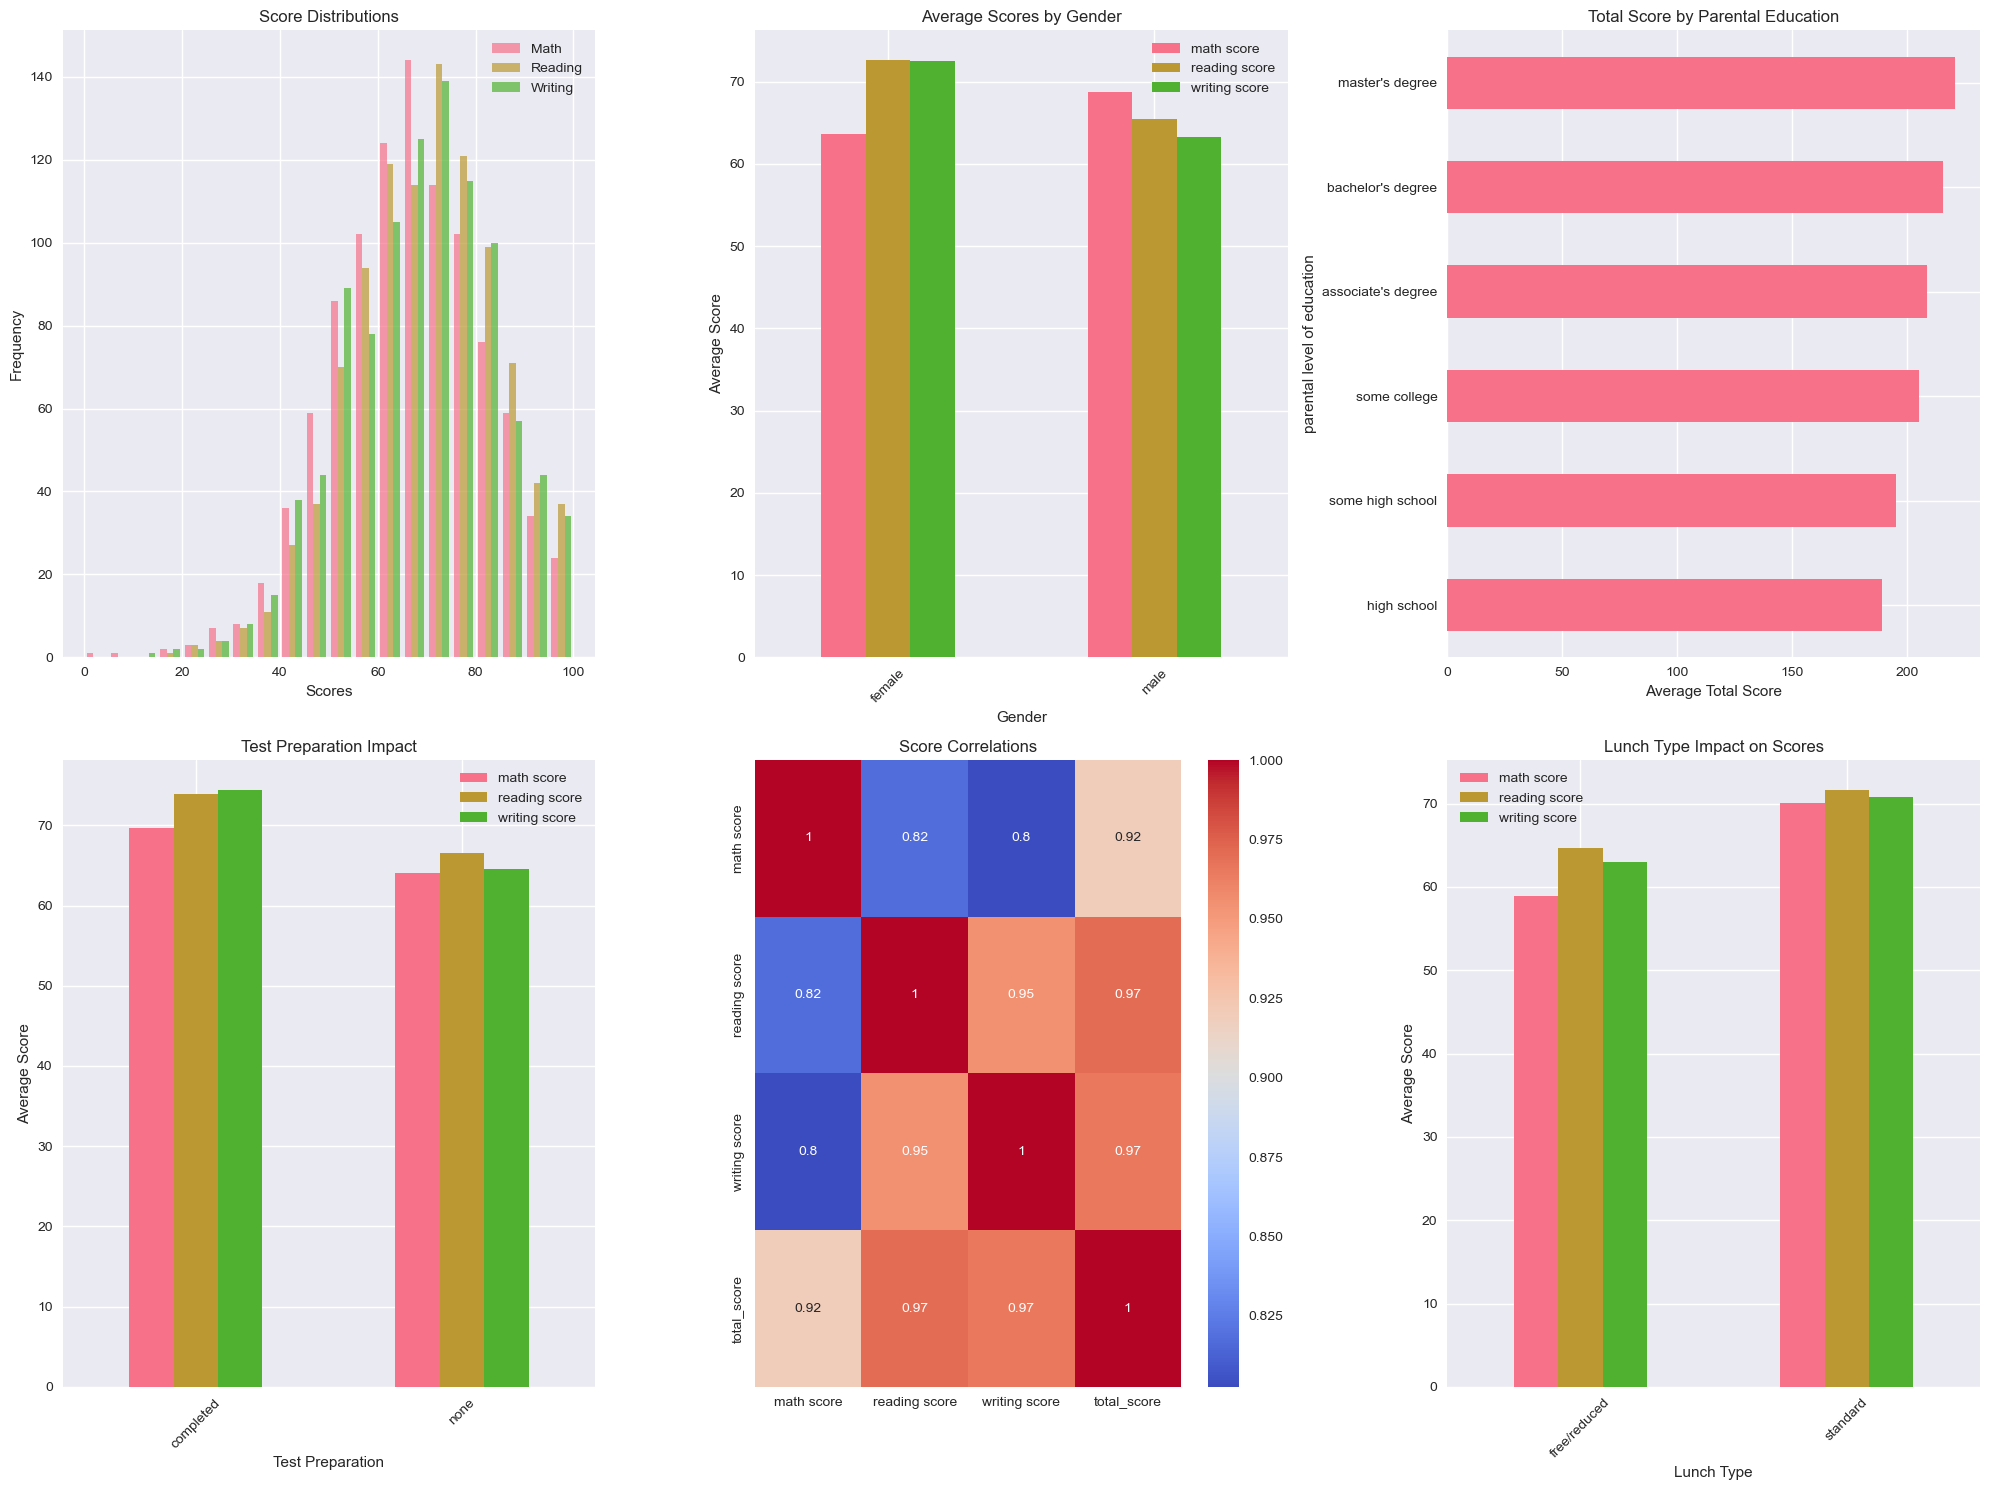


 STATISTICAL ANALYSIS
KEY INSIGHTS:
• Average Math Score: 66.09
• Average Reading Score: 69.17
• Average Writing Score: 68.05

Gender Analysis:
• Female: Math=63.6, Reading=72.6, Writing=72.5
• Male: Math=68.7, Reading=65.5, Writing=63.3

Test Preparation Impact:
• Completed: Math=69.7, Reading=73.9, Writing=74.4
• None: Math=64.1, Reading=66.5, Writing=64.5

 MACHINE LEARNING MODEL
Linear Regression:
  • Mean Squared Error: 16.59
  • R² Score: 0.931

Random Forest:
  • Mean Squared Error: 20.61
  • R² Score: 0.915

Feature Importance (Random Forest):
• reading score: 0.926
• math score: 0.029
• parental level of education: 0.012
• race/ethnicity: 0.011
• gender: 0.010
• test preparation course: 0.008
• lunch: 0.003

 PROJECT SUMMARY REPORT

STUDENT PERFORMANCE ANALYSIS - PROJECT SUMMARY

Dataset Overview:
• Total Students: 1000
• Features: 9
• Score Range: 0-100

Key Findings:
• Average Scores: Math(66.1), Reading(69.2), Writing(68.1)
• High correlation between reading and writing sc

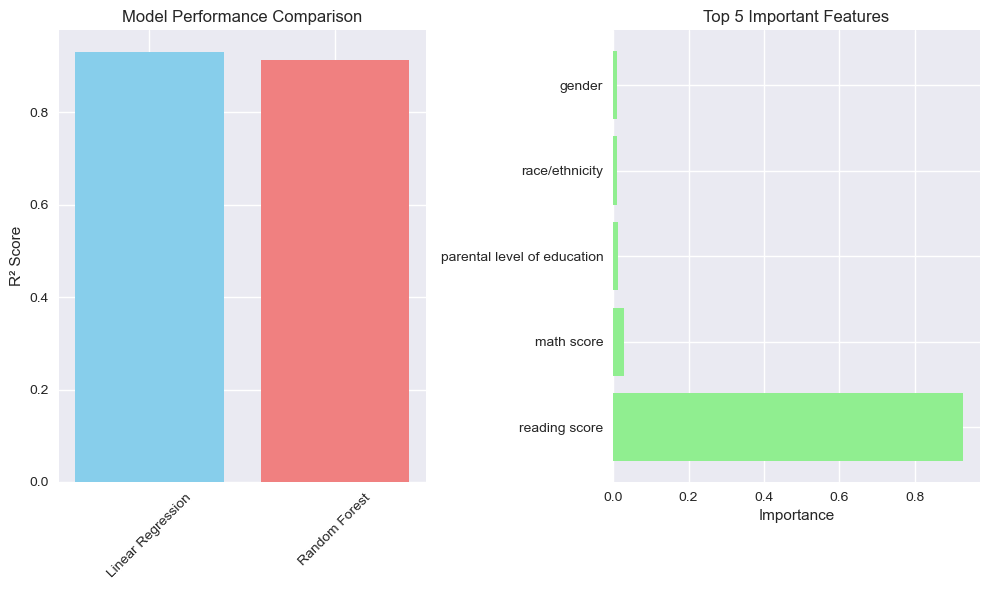

In [1]:
# Student Performance Analysis


# Step 1: Install and Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" Student Performance Analysis Project")
print("=" * 50)


# Option 2: Load from GitHub (recommended for quick start)
url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"

try:
    df = pd.read_csv(url)
    print(" Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except:
    # Option 3: Create sample data if URL fails
    print("Creating sample dataset...")
    np.random.seed(42)
    n_samples = 1000

    df = pd.DataFrame({
        'gender': np.random.choice(['male', 'female'], n_samples),
        'race/ethnicity': np.random.choice(['group A', 'group B', 'group C', 'group D', 'group E'], n_samples),
        'parental level of education': np.random.choice([
            'some high school', 'high school', 'associate\'s degree',
            'bachelor\'s degree', 'master\'s degree'], n_samples),
        'lunch': np.random.choice(['standard', 'free/reduced'], n_samples),
        'test preparation course': np.random.choice(['none', 'completed'], n_samples),
        'math score': np.random.randint(0, 101, n_samples),
        'reading score': np.random.randint(0, 101, n_samples),
        'writing score': np.random.randint(0, 101, n_samples)
    })
    print(" Sample dataset created!")

# Step 3: Data Exploration and Analysis
print("\n DATA EXPLORATION")
print("=" * 30)

# Basic info about dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Description:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Data Visualization
print("\n CREATING VISUALIZATIONS")
print("=" * 30)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. Distribution of scores
plt.subplot(2, 3, 1)
plt.hist([df['math score'], df['reading score'], df['writing score']],
         alpha=0.7, label=['Math', 'Reading', 'Writing'], bins=20)
plt.title('Score Distributions')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()

# 2. Gender vs Average Scores
plt.subplot(2, 3, 2)
gender_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores.plot(kind='bar', ax=plt.gca())
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend()

# 3. Parental Education Impact
plt.subplot(2, 3, 3)
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
education_scores = df.groupby('parental level of education')['total_score'].mean().sort_values()
education_scores.plot(kind='barh', ax=plt.gca())
plt.title('Total Score by Parental Education')
plt.xlabel('Average Total Score')

# 4. Test Preparation Impact
plt.subplot(2, 3, 4)
prep_scores = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
prep_scores.plot(kind='bar', ax=plt.gca())
plt.title('Test Preparation Impact')
plt.xlabel('Test Preparation')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend()

# 5. Correlation Heatmap
plt.subplot(2, 3, 5)
numeric_cols = ['math score', 'reading score', 'writing score', 'total_score']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=plt.gca())
plt.title('Score Correlations')

# 6. Lunch Type Impact
plt.subplot(2, 3, 6)
lunch_scores = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
lunch_scores.plot(kind='bar', ax=plt.gca())
plt.title('Lunch Type Impact on Scores')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig('student_performance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Step 5: Statistical Analysis
print("\n STATISTICAL ANALYSIS")
print("=" * 30)

# Key insights
print("KEY INSIGHTS:")
print(f"• Average Math Score: {df['math score'].mean():.2f}")
print(f"• Average Reading Score: {df['reading score'].mean():.2f}")
print(f"• Average Writing Score: {df['writing score'].mean():.2f}")

# Gender analysis
gender_analysis = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(f"\nGender Analysis:")
for gender in gender_analysis.index:
    print(f"• {gender.title()}: Math={gender_analysis.loc[gender, 'math score']:.1f}, "
          f"Reading={gender_analysis.loc[gender, 'reading score']:.1f}, "
          f"Writing={gender_analysis.loc[gender, 'writing score']:.1f}")

# Test preparation analysis
prep_analysis = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(f"\nTest Preparation Impact:")
for prep in prep_analysis.index:
    print(f"• {prep.title()}: Math={prep_analysis.loc[prep, 'math score']:.1f}, "
          f"Reading={prep_analysis.loc[prep, 'reading score']:.1f}, "
          f"Writing={prep_analysis.loc[prep, 'writing score']:.1f}")

# Step 6: Machine Learning Model
print("\n MACHINE LEARNING MODEL")
print("=" * 30)

# Prepare data for ML
# Convert categorical variables to numeric
df_ml = df.copy()
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_columns:
    df_ml[col] = pd.Categorical(df_ml[col]).codes

# Features and target
X = df_ml[categorical_columns + ['math score', 'reading score']]
y = df_ml['writing score']  # Predict writing score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

model_results = {}

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results[name] = {'MSE': mse, 'R2': r2}

    print(f"{name}:")
    print(f"  • Mean Squared Error: {mse:.2f}")
    print(f"  • R² Score: {r2:.3f}")
    print()

# Step 7: Feature Importance (Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
for idx, row in feature_importance.iterrows():
    print(f"• {row['feature']}: {row['importance']:.3f}")

# Step 8: Create Summary Report
print("\n PROJECT SUMMARY REPORT")
print("=" * 40)

summary_report = f"""
STUDENT PERFORMANCE ANALYSIS - PROJECT SUMMARY
=============================================

Dataset Overview:
• Total Students: {len(df)}
• Features: {len(df.columns)}
• Score Range: 0-100

Key Findings:
• Average Scores: Math({df['math score'].mean():.1f}), Reading({df['reading score'].mean():.1f}), Writing({df['writing score'].mean():.1f})
• High correlation between reading and writing scores ({correlation_matrix.loc['reading score', 'writing score']:.3f})
• Test preparation shows positive impact on performance
• Parental education level correlates with student performance

Machine Learning Results:
• Best Model: {max(model_results.keys(), key=lambda x: model_results[x]['R2'])}
• Best R² Score: {max([results['R2'] for results in model_results.values()]):.3f}

Most Important Features:
{feature_importance.head(3).to_string(index=False)}

Generated on: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

print(summary_report)

# Step 9: Save Results
print("\n SAVING RESULTS")
print("=" * 20)

# Save processed dataset
df.to_csv('student_performance_processed.csv', index=False)
print(" Processed dataset saved as 'student_performance_processed.csv'")

# Save feature importance
feature_importance.to_csv('feature_importance.csv', index=False)
print(" Feature importance saved as 'feature_importance.csv'")

# Save summary report
with open('project_summary.txt', 'w') as f:
    f.write(summary_report)
print(" Summary report saved as 'project_summary.txt'")

# Save model results
model_results_df = pd.DataFrame(model_results).T
model_results_df.to_csv('model_results.csv')
print(" Model results saved as 'model_results.csv'")

print("\n PROJECT COMPLETED SUCCESSFULLY!")
print("Files created for GitHub upload:")
print("• student_performance_analysis.png (visualization)")
print("• student_performance_processed.csv (processed data)")
print("• feature_importance.csv (ML insights)")
print("• model_results.csv (model performance)")
print("• project_summary.txt (summary report)")

# Display final performance plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
models_names = list(model_results.keys())
r2_scores = [model_results[name]['R2'] for name in models_names]
plt.bar(models_names, r2_scores, color=['skyblue', 'lightcoral'])
plt.title('Model Performance Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
top_features = feature_importance.head(5)
plt.barh(top_features['feature'], top_features['importance'], color='lightgreen')
plt.title('Top 5 Important Features')
plt.xlabel('Importance')

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

